In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;warnings.filterwarnings('ignore') 

In [2]:
Sales = pd.read_csv('SalesData.csv')

In [3]:
Sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


# 1. Compare Sales by region for 2016 with 2015 using bar chart

<Axes: xlabel='Region', ylabel='Sales2016'>

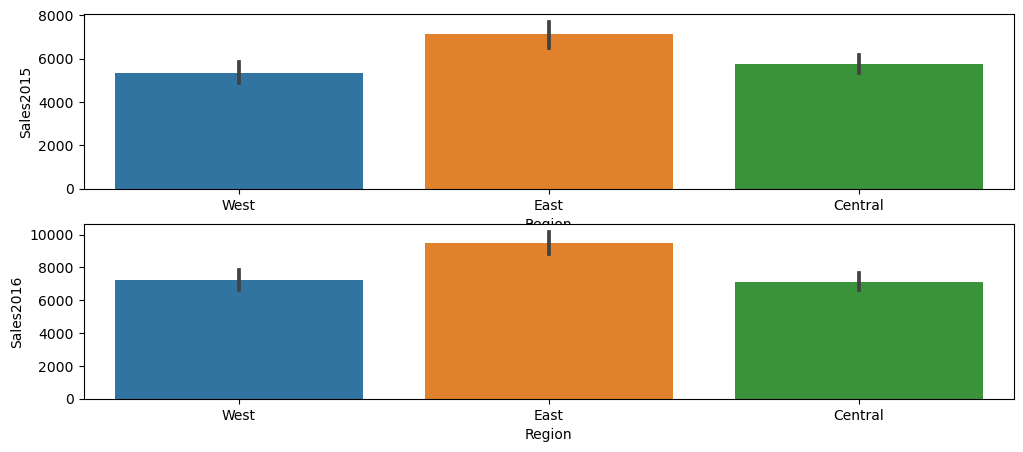

In [4]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize = [12,5])
sns.barplot(data=Sales,x= 'Region',y='Sales2015',ax=axes[0])
sns.barplot(data=Sales,x= 'Region',y='Sales2016',ax=axes[1])

# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

array([<Axes: ylabel='Sales2016'>, <Axes: ylabel='TargetAchevied2016'>,
       <Axes: ylabel='Units2016'>], dtype=object)

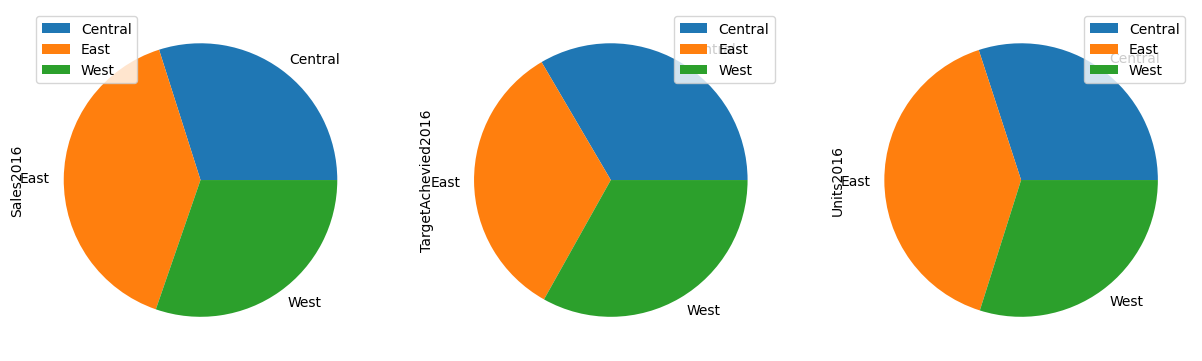

In [48]:
#Sales and its contributing factors such as Units and Targets achieved
s = pd.pivot_table(data=Sales,index = 'Region', values = ['Sales2016','Units2016','TargetAchevied2016'])
s.plot(x='Region',kind='pie',subplots=True,figsize=[15,9])

# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

<Axes: xlabel='Region'>

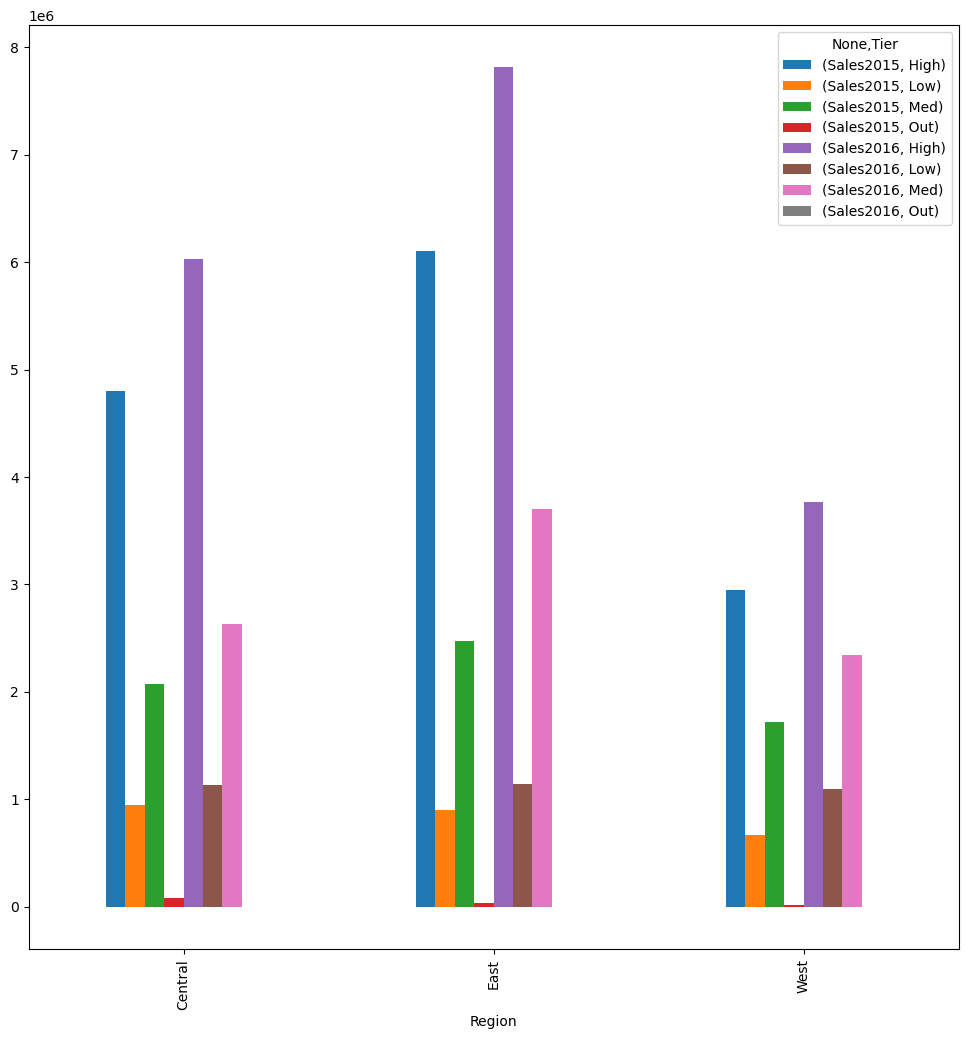

In [27]:
rt = pd.pivot_table(data=Sales,index='Region',columns='Tier',values=['Sales2016','Sales2015'],aggfunc='sum')
rt.plot(kind='bar',stacked=False,figsize=[12,12])

# 4. In East region, which state registered a decline in 2016 as compared to 2015?

<Axes: xlabel='State'>

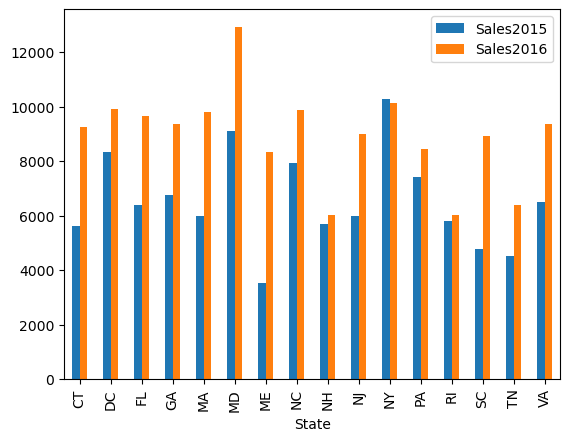

In [37]:
East = Sales[(Sales.Region =='East')]
e = East.pivot_table(index = 'State',values=['Sales2016','Sales2015'])
e.plot(kind='bar',stacked=False)

# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [38]:
Sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


<Axes: xlabel='Division'>

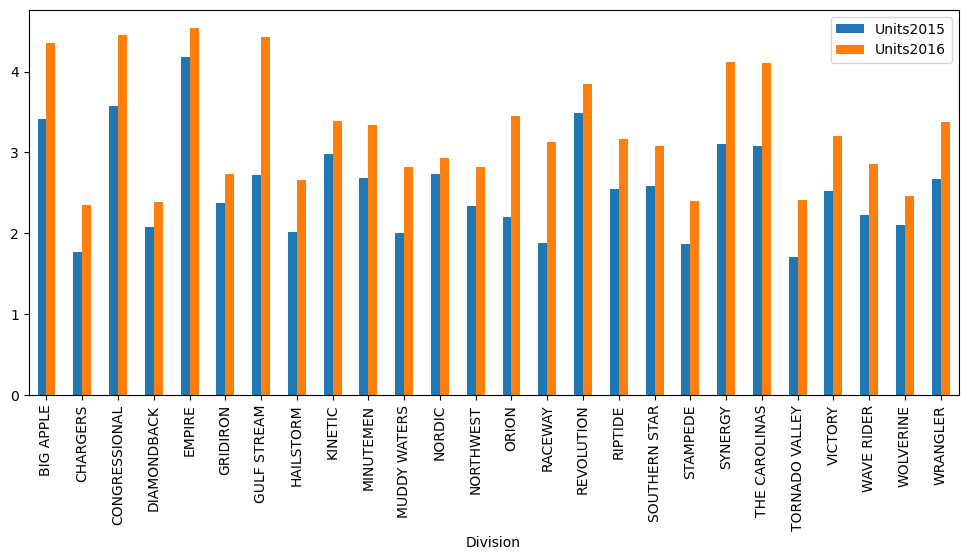

In [66]:
High = Sales[(Sales.Tier=='High')]
h = High.pivot_table(index='Division',values=['Units2016','Units2015'])
h.plot(kind='bar', stacked=False, figsize=[12,5])

# 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months

In [3]:
m=[Sales['Month'].isin(['Jan','Feb','Mar']),
  Sales['Month'].isin(['Apr','May','Jun']),
  Sales['Month'].isin(['Jul','Aug','Sep']),
  Sales['Month'].isin(['Oct','Nov','Dec'])]
quarters = ['Q1','Q2','Q3','Q4']

Sales['Quarters'] = np.where(m[0], quarters[0],
                            np.where(m[1], quarters[1],
                                    np.where(m[2], quarters[2],
                                             quarters[3])))

Sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Quarters
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

<Axes: xlabel='Quarters'>

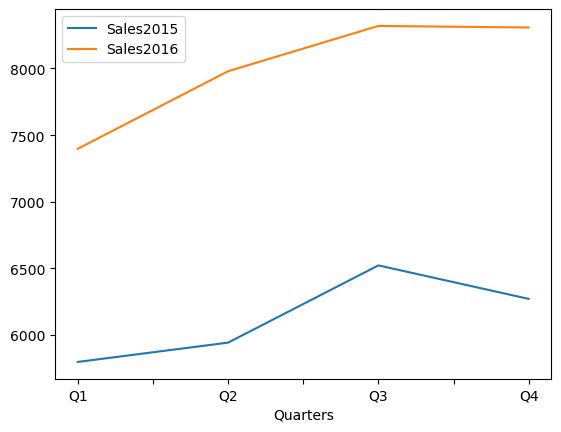

In [68]:
q = pd.pivot_table(data=Sales,index='Quarters', values =['Sales2016','Sales2015'])
q.plot(kind='line')

# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

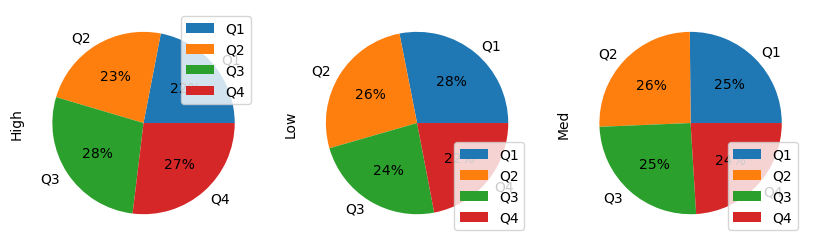

In [35]:
tiers = Sales[Sales['Tier']!='Out']
quarters = tiers.groupby(['Quarters','Tier'])['Sales2016'].sum()
quarters = quarters.unstack(level=0)
quarters = quarters.T
quarters.plot(kind='pie',x='Quarters',subplots=True,autopct='%1.0f%%',figsize=[10,8])
plt.show()